In [96]:
# -*- coding: utf-8 -*-
"""
用途：教学
20220328  sqx
"""


# 二维数据集决策边界可视化
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

"""
类说明：构建感知机

Parameters:
    eta - 学习率(0,1]
    n_iter - 迭代次数
    w_ - 训练后的权重数组
    errors_ - 每轮训练后的误差

Returns:
    None

"""


class Perceptron(object):
    wList=[]

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    """
    Fit training data
    Parameters
    X: {array-like}, shape=[n_samples, n_features]
       Trainig vectors, where n_samples is the number of samples and n_features is the number of features.
    y: array-like, shape = [n_samples]
       Target values.
    Returns
    self: object
    """

    def fit(self, X, y):
        # self.w_中的权值初始化为一个零向量R(m+1),其中m是数据集中维度(特征)的数量
        # 我们在此基础上增加一个0权重列(也就是阈值)
        self.w_ = np.zeros(1 + X.shape[1])
        
        self.errors_ = []
        self.wList=[]
        while 1:
            errors = 0
            for xi, target in zip(X, y):
                #########################  填空-sqx #############################
                # 填空-sqx  更新self.w_
                # 通常需要不止一句

                # 计算预测结果
                py = 1 if np.dot(self.w_[1:], xi)+self.w_[0] >= 0 else -1
                # 预测结果与实际的偏差
                update = py-target
                # 错误预测
                if update != 0.00:
                    w = np.zeros(1 + X.shape[1])
                    # 更新权重
                    w[1:] = self.eta*target*xi+self.w_[1:]
                    w[0] = self.eta*target+self.w_[0]
                    self.wList.append(w)
                    self.w_=w
                # 每轮中错分类样本的数量
                errors += int(update != 0.0)
            if errors==0:
                break
            
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        # 计算X和w_的点积
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



"""
函数说明：绘制决策区域图像

Parameters:
    X - 特征矩阵
    y - label列向量
    classifier - 分类器
    resolution - 采样间隔为0.02

Returns:
    None

Modify:
    2018-08-28
"""


def plot_decision_regions(X, y, wList, resolution=0.02):
    # 散点样式
    markers = ('s', 'x', 'o', '^', 'v')
    # 颜色元组
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # np.unique该函数是去除数组中的重复数字，并进行排序之后输出。
    # ListedColormap主要用于生成非渐变的颜色映射
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 横轴范围
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # 纵轴范围
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # meshgrid函数将最大值、最小值向量生成二维数组xx1和xx2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    X=np.array([xx1.ravel(), xx2.ravel()]).T;
    fig,axs=plt.subplots(4,4,figsize=(15,15),sharex=True,sharey=False)
    fig.suptitle('use .suptitle() to add a figure title')
    
    c=0
    l=0
    for w in wList:
        z = np.where((np.dot(X,w[1:])+w[0])>=0.0,1,-1)
        z = z.reshape(xx1.shape)
        axs[c][l].contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
        # 对于一个可迭代的（iterable）/可遍历的对象（如列表、字符串），enumerate将其组成一个索引序列，利用它可以同时获得索引和值
        axs[c][l].scatter(x[:2,0],x[:2,1])
        axs[c][l].scatter(x[2,0],x[2,1])
        l+=1
        if l==4:
            l=0
            c+=1


[array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.]), array([-5.,  1.,  3.])]


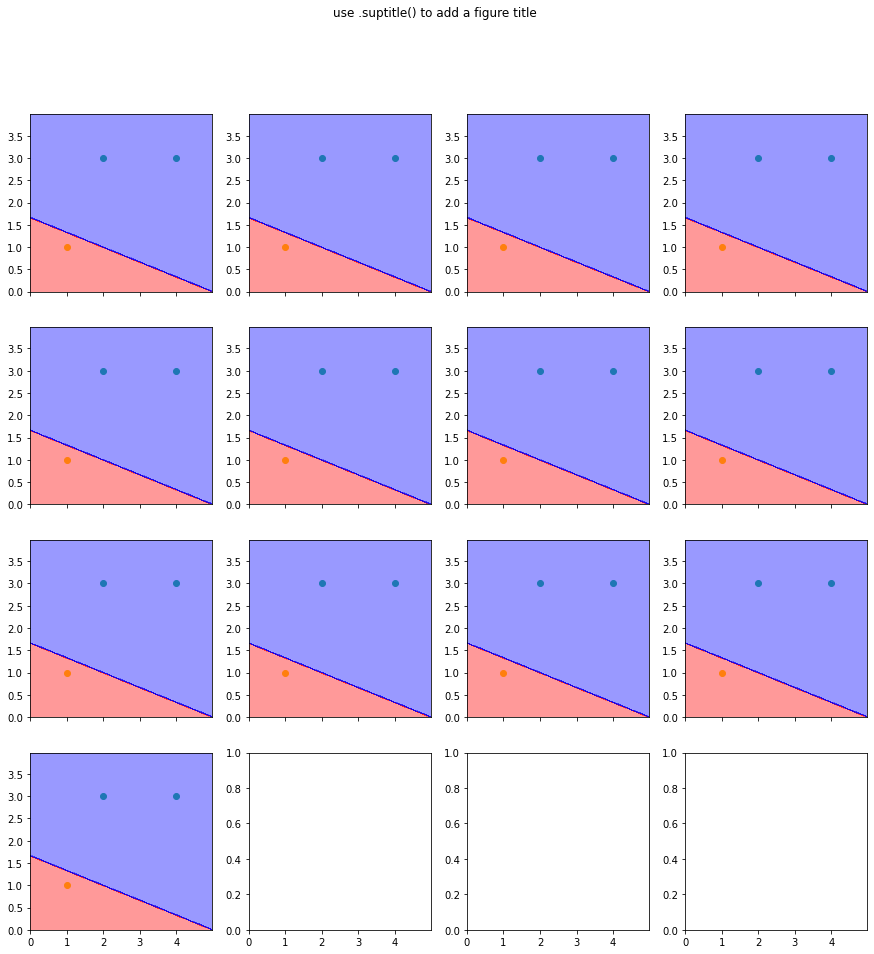

In [97]:
if __name__ == '__main__':
    x=np.array([[2,3],[4,3],[1,1]])
    y=np.array([1,1,-1])
    ppn = Perceptron(eta=1)
    # 训练模型
    ppn.fit(x, y) 
    print(ppn.wList)
    plot_decision_regions(x,y,ppn.wList)

